In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 1. Load CSV safely
solar_path = r"C:\Users\Administrator\v2g\nasa_solar.csv"

solar_df = pd.read_csv(solar_path, skiprows=11, header=None)

print(solar_df.head())
print(solar_df.columns)

      0  1  2     3       4
0  2025  1  1  5.31  0.6629
1  2025  1  2  5.66  0.8328
2  2025  1  3  6.77  1.4237
3  2025  1  4  6.56  1.4942
4  2025  1  5  4.80  0.5794
Index([0, 1, 2, 3, 4], dtype='int64')


In [3]:
# 2. Assign proper column names (based on NASA POWER format)
solar_df.columns = [
    "YEAR", "MO", "DY",
    "T2M_RANGE",            # Temperature range
    "ALLSKY_SFC_SW_DWN"     # Solar irradiance
]

In [4]:
# 3. Create DATE column
solar_df["DATE"] = pd.to_datetime(
    solar_df["YEAR"].astype(str) + "-" +
    solar_df["MO"].astype(str) + "-" +
    solar_df["DY"].astype(str)
)

In [5]:
# 4. Set DATE as index
solar_df = solar_df.set_index("DATE")

In [6]:
# 5. Keep only solar and temperature columns
solar_df = solar_df[["ALLSKY_SFC_SW_DWN", "T2M_RANGE"]]
solar_df.columns = ["solar_irradiance", "temp_c"]

In [7]:
# 6. Resample daily → 15-minute intervals and interpolate
solar_15min = solar_df.resample("15min").interpolate()

In [8]:
# 7. MinMax scaling
scaler = MinMaxScaler()
solar_15min[["solar_scaled", "temp_scaled"]] = scaler.fit_transform(
    solar_15min[["solar_irradiance", "temp_c"]]
)

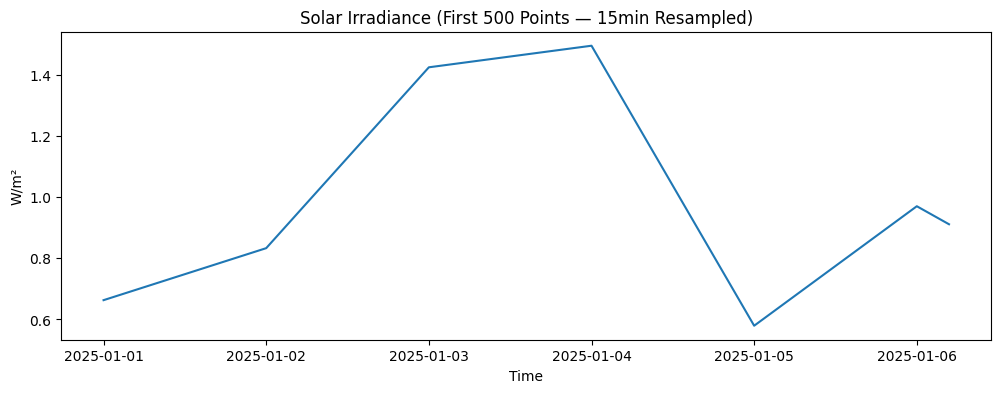

In [9]:
# 8. Plot first 500 points
plt.figure(figsize=(12,4))
plt.plot(solar_15min["solar_irradiance"][:500])
plt.title("Solar Irradiance (First 500 Points — 15min Resampled)")
plt.xlabel("Time")
plt.ylabel("W/m²")
plt.show()

In [10]:
# 9. Save clean 15-minute dataset
solar_clean_path = r"C:\Users\Administrator\v2g\clean_solar_data_15min.csv"
solar_15min.to_csv(solar_clean_path)

solar_clean_path

'C:\\Users\\Administrator\\v2g\\clean_solar_data_15min.csv'